<a href="https://colab.research.google.com/github/Monicajia/100-Days-Of-ML-Code/blob/master/01%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**机器学习知识总结**


作者：mz
时间：2023年4月

# 机器学习基础

------------------------------------------------------------以下是菜鸟使用colaboratory的技巧备忘录----------------------———————————————————

1. 将图片插入到colabortory的过程

在Google Colab中添加以下代码以授权和挂载您的Google Drive：
```
from google.colab import drive
drive.mount('/content/drive')

```
选择图片

```
from PIL import Image
image_path = "/content/drive/My Drive/picture/1-2.webp"
image = Image.open(image_path)
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()
```



----------------------

---



---



参考资料：https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/Index.ipynb#scrollTo=Hbb7NM9JMXzc

## 机器学习的主要内容：


**有监督学习：**建立一个能够根据带标记的训练数据对数据进行标签预测的模型

分类：建立一个能够预测两个或多个离散分组标签的模型

回归：建立一个能够预测连续标签的模型

**无监督学习：**建立一个能够识别未标记数据内在结构的模型

聚类：建立一个检查和识别数据不同分组的模型

降维：建立一个能发现高维度数据在低维度情况下结构的模型

## 机器学习的知识框架

# 模型验证和评估

有监督机器学习模型的基本过程：

1. 选择一个模型类别
2. 选择模型超参数
3. 将模型拟合到训练数据上
4. 将模型在新数据上进行预测列表项

那么对于超参数的选择和模型拟合情况是否比较好需要一定的检验，也就是模型验证。
原理就是：选择了模型类别和它的超参数之后，我们将它应用到一些训练数据上进行训练，然后将它的预测值和已知值进行比较。

## 划分训练集和测试集

做法：将一部分数据集保留出来不参与训练，并使用它们对模型的性能进行评估。我们将数据中的部分子集从训练集中分离出来，然后再将它们预测的结果和预先标记的结果进行对比得到模型性能。这可以通过Scikit-Learn的train_test_split工具完成。

下面以鸢尾花数据为例：

选择模型和超参数。这里使用k近邻算法，超参数n_neighbors=1。这是一个非常简单和直观的模型，它认为“未知的点的标签与距离它最近的训练点的标签是一样的”。

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
#print(iris) 
# 将数据集按照50%分成两个子集-训练集和测试集
X_train ,X_test ,y_train ,y_test = train_test_split (iris.data, iris.target, random_state=10, test_size=0.5)
# k近邻算法进行模型拟合
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
# 对测试集数据进行预测，评估模型预测准确率
y_predict = knn.predict(X_train)
accuracy = accuracy_score(y_test,y_predict)
print("模型准确度:",accuracy)

模型准确度: 0.24


最近邻分类器在这样划分了训练集和测试集后，能得到大约97%的准确率。这里保留出的子数据集类似未知的数据，因为模型根本没有见过它们。

## 模型的交叉验证
保留数据子集来验证模型的方式缺点：
其中一部分数据无法参与模型的训练过程，一半的数据集对于模型没有贡献，特别是原始数据规模本身比较小的时候就会出现问题。

**解决方法：交叉验证**

在称为k-fold交叉验证的基本方法中，训练集被分成k个较小的子集。对于k个折中的每一个都遵循以下步骤:

1. 使用子集作为训练集来训练模型;
2. 模型的结果在数据的其余部分上进行验证。
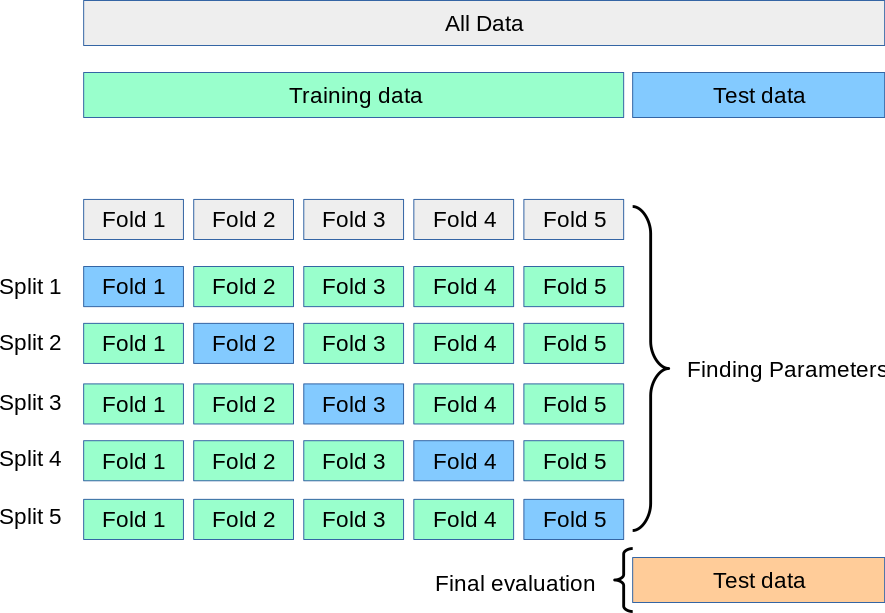

优势：这种方法在计算上可能很昂贵，但不会浪费太多数据。这在样本数量非常少的情况下具有优势。

#### 两折交叉验证

这里我们使用两次验证过程，每次使用不同的一半数据作为保留的数据集来验证模型。使用上面分好的数据，我们使用下面的代码实现：

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = load_iris()
# 将数据集分为平均的两半，自变量就是（iris.data）因变量就是（iris.target）
X_1, X_2, y_1, y_2 = train_test_split(iris.data, iris.target, 
                     test_size=0.5, random_state=0)
# 构建k近邻分类器
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:

# 使用训练集进行模型训练
y2_model=knn.fit(X_1, y_1).predict(X_2)
y1_model=knn.fit(X_2, y_2).predict(X_1)

# 使用测试集进行模型评估
accuracy2 = accuracy_score(y_2,y2_model)
accuracy1 = accuracy_score(y_1,y1_model)
print("Test y1 accuracy: {:.4f}".format(accuracy1))
print("Test y2 accuracy: {:.4f}".format(accuracy2))


Test y1 accuracy: 0.9733
Test y2 accuracy: 0.9600



输出了两个准确率结果，我们可以组合（例如通过取平均值）来获得更好的全局性能结果。上面这个特殊的交叉验证过程被称为*双重检查验证*，也就是我们将数据均分为两个子数据集，然后依次使用它们作为测试集。

我们可以将这个方法扩展到更多的拟合过程，将数据划分为更多子集进行更多重训练验证，例如下图是一个五重交叉验证：

![](picture/5-fold-CV.png)
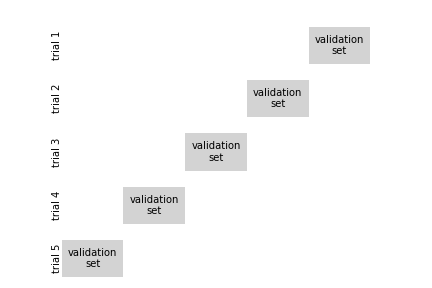


这里我们将数据分成5组，每次使用其中一组来评估模型，其余的4/5用来训练模型。每次都要手动完成这项工作是很无聊的，因此我们可以使用Scikit-Learn的`cross_val_score`工具来直接完成它：

#### 多折交叉验证

Scikit-Learn实现了许多有用的交叉验证方案，它们适合于特定的场景；这些方案都是在model_selection模块中实现的。

In [ ]:
# 使用5折交叉验证进行模型评估
scores = cross_val_score(knn, iris.data, iris.target, cv=5) #使用5折交叉验证
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.97


### 留一法


采用一种极端的方案，该方案中数据的分组等于数据的样本数：也就是说，我们使用除了一个数据点外的其他所有数据进行训练。这种交叉验证被成为leave-one-out交叉验证，如下例：


In [ ]:
from sklearn.model_selection import LeaveOneOut
# 这里不需要手动将数据划分为训练集和测试集所以直接将X的内容（iris.data）和y (iris.target)放进模型中就可以，交叉验证方法选择留一法
scores = cross_val_score(knn, iris.data, iris.target, cv=LeaveOneOut())  
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

因为我们有150个样本，leave-one-out交叉验证会得到150个验证结果，结果只有两种状态：验证成功（1.0）或验证失败（0.0）。对上面的结果数组求平均值能得到一个估计的准确率：

In [ ]:
scores.mean()

0.9666666666666667

### ？bootstrap

## 选择最佳模型

#### 误差和方差的权衡

variance和bias的意义：

variance：如果我们用不同训练集去估计，那么fhat的变动量，不同的训练集估计到的yhat是不同的，但是理想来说，这个variance应该尽可能的小。更加灵活的统计会有更高的variance。


bias：指的是估计现实情况所导致的错误，例如用线性模型估计现实，往往真实世界的关系并不如线性表达中的那么简单，所以用线性回归模型去估计不可避免地会有偏误。但是越灵活地模型，与真实数据越接近，偏误越小。

所以我们使用更加flexible模型时，偏误（bias）会降低，但是方差（variance）会增加


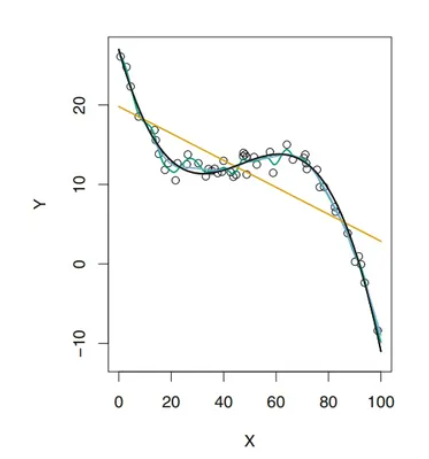


* 黄色模型试图找出一条直线来拟合数据。因为这个数据很明显比直线要复杂的多，因此直线模型不可能很好的描述这个数据集。这样的模型我们称为“欠拟合”：也就是说，它没有提供足够的模型灵活性来反映出数据的所有特征；用另一种说法就是这个模型有着高的偏差（bias）。
* 绿色模型使用一个高阶的多项式来拟合数据，具有足够的灵活性几乎完美的描述了数据中的特征，虽然它很精确的描述了训练数据，但是它的这种精确性可能更多反映了对数据噪声特征的反映而不是内在主要特征的反映。这样的模型被称为是**“过拟合”**的：也就是说它有着很好的模型灵活性，甚至反映了数据的随机误差；另一种说法就是这个模型有着高的方差（variance）。

* 对于低复杂度模型（高偏差模型）来说，训练数据是欠拟合的，这代表着模型既不能很好的预测训练数据也不能很好的预测未知数据。
* 对于非常高复杂度模型（高方法模型）来说，训练数据是过拟合的，这代表着模型能非常好的预测训练数据，但是不能很好的预测未知数据。
* 对于中间部分来说，验证曲线有一个最大值。这个点代表着偏差和方差的最佳平衡点。


**variance、bias之间的关系：trade-off**


因此，模型越复杂，训练集内部的偏差（bias）越来越小，但是测试集的方差（variance）越来越大，要找到bias和variance之间的平衡点。



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


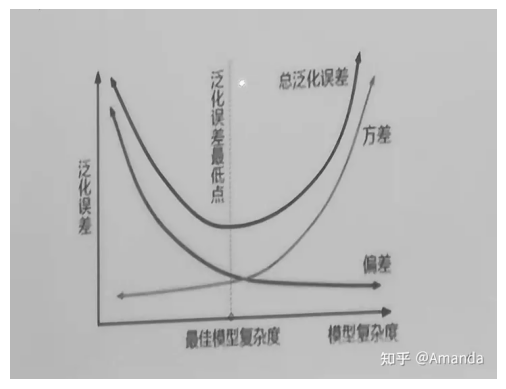

In [ ]:
from PIL import Image
image_path = "/content/drive/My Drive/picture/1-2.webp"
image = Image.open(image_path)
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()

### 评估模型的可视化方式

#### 验证曲线：Validation curves

使用交叉验证来计算一种模型的验证曲线。这里我们将使用多项式回归模型：这是一个广义的线性模型，其中的多项式的阶是可调整的参数。例如，一阶的多项式将数据拟合到一条直线上；模型参数有$a$ 和 $b$ ：
$$
y = ax + b
$$



一个三阶的多项式将数据是配到一条三次方程曲线上；模型参数有$a, b, c, d$：

$$
y = ax^3 + bx^2 + cx + d
$$



我们可以推广到任意阶的多项式中。在Scikit-Learn中我们可以通过将线性回归与多项式预处理器结合起来实现这个任务。我们会使用*pipeline*将这些操作串联起来

创建数据拟合模型

生成一个二元组(X, y)，其中X是一个形状为(N, 1)的NumPy数组，y是一个形状为(N,)的NumPy数组。

猜测X与y之间的关系？几阶？何种曲线能够拟合？

In [30]:
import numpy as np
def make_data(N,err=1.0,rseed=1): #N，表示生成数据样本的数量；err，表示生成的数据的噪声；rseed，表示随机数生成器的种子
  #随机数据取样生成
  rng = np.random.RandomState(rseed) #使用NumPy库中的随机数生成器np.random.RandomState生成N个随机的二维数据点，并对数据点的X值进行平方处理。
  X = rng.rand(N, 1)** 2
  y = 10 - 1. / (X.ravel() + 0.1) #X.ravel()表示将X变为一维数组
  if err > 0:
    y += err * rng.randn(N) #如果err > 0，则加上误差项
    return X, y 

X,y =make_data(40)
#print(X,y)


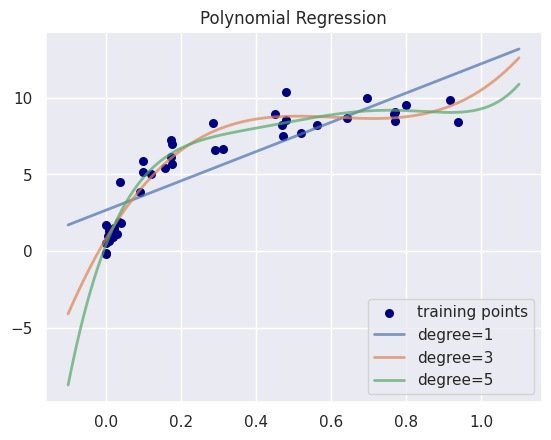

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)

# 绘制原始数据
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")

# 循环创建不同阶数的多项式回归模型，并绘制预测结果
for degree in [1, 3, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    y_test = model.fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, linewidth=2, alpha=0.7, label='degree={0}'.format(degree))

# 绘制图例和标题
plt.legend(loc='lower right')
plt.title("Polynomial Regression")
plt.show()


也可以通过定义函数写成管道模式：

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
    #定义的这个函数目的在于将拟合模型的过程做成管道。
    #1.创建一个指定阶数的多项式回归模型，
    #2.训练集和测试集，
    #3.拟合特征值和目标变量之间的线性关系，从而得到回归模型
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
X_test = np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
  y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
  plt.plot(X_test.ravel(), y_test, label="degree={0}".format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc="best");

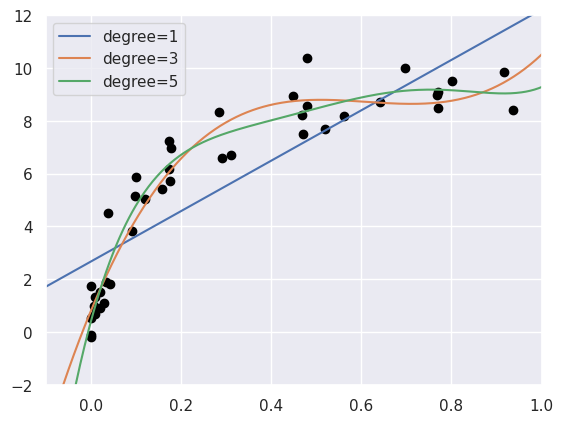

**问题：**几阶的多项式在偏差（欠拟合）和方差（过拟合）之间达到了合适的平衡？

我们还可以进一步将这个特殊的数据和模型的验证曲线绘制出来；这可以直接通过```Scikit-Learn```提供的```validation_curve```工具完成。给定模型、数据、参数名称和一个范围，这个函数能够自动计算范围内所有的训练分数和验证分数：

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


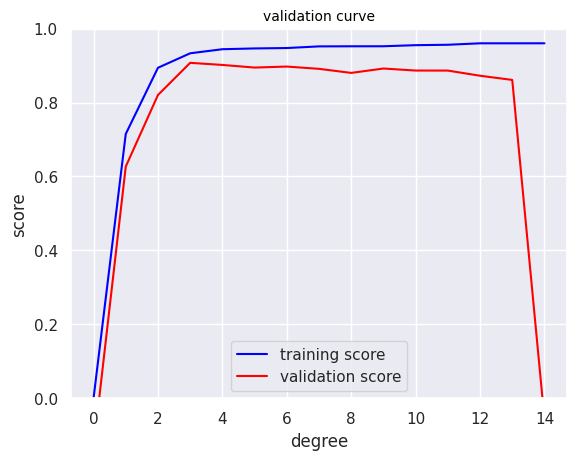

In [51]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 15)
print(degree)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,param_name='polynomialfeatures__degree', param_range=degree)
plt.plot(degree,np.median(train_score,1), color="blue", label="training score")
plt.plot(degree,np.median(val_score,1), color="red", label="validation score")
plt.legend(loc="best")
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")
plt.title("validation curve",fontsize=10, color="black")
plt.show()


*注释：*
```
validation_curve(estimator, X, y, param_name, param_range, cv=None, scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score='raise')
```

Here's what each argument stands for:

- `estimator`: the model or estimator to use for fitting the data
- `X`: the input features or predictors
- `y`: the target variable
- `param_name`: the name of the hyperparameter to vary
- `param_range`: the range of values to use for the hyperparameter
- `cv`: the cross-validation strategy to use (optional)
- `scoring`: the scoring metric to use (optional)
- `n_jobs`: the number of CPU cores to use (optional)
- `pre_dispatch`: the number of batches to use for parallel execution (optional)
- `verbose`: the verbosity level (optional)
- `error_score`: the value to assign when an error occurs (optional)

训练分数在任何地方都高于验证分数；训练分数是一个单调递增函数，随着模型复杂度增加而增加；然而验证分数在达到最大值后会因为过拟合而开始下降。

可以看到最优的偏差和方差平衡出现在三阶的多项式附近.


在原始数据上拟合这个模型：

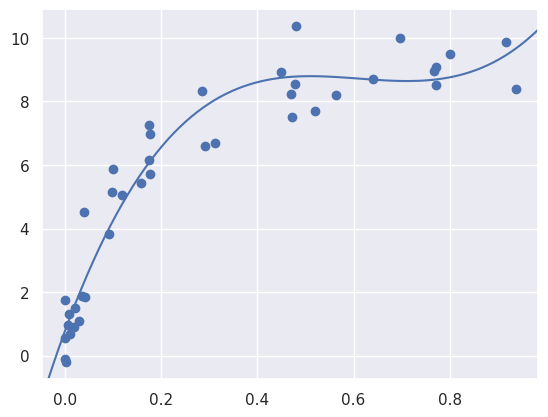

In [52]:
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test =PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

#### ?学习曲线：learning curve

### 使用网格搜索选择最好模型

模型的偏差和误差取决于模型复杂度和训练集规模。在实践中，模型通常有多于一个开关进行调节，因此前面关于验证曲线和学习曲线的二维线条就会变成多维平面。在这些情况下，要将它可视化出来是很困难的，并且我们更希望简单的找到特定模型能最大化验证分数。
sklearn提供了自动化的工具来完成这项任务，它们在网格搜索模块中
下面是一个使用网格搜索找到最优多项式模型的例子。
我们会探索模型特征的一个三维网格；包括多项式阶数，一个是否拟合截距的标志和一个是否归一化问题的标志。这可以通过Scikit-Learn的GridSearchCV元评估器来设置：

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'polynomialfeatures__include_bias': [True, False],
              'polynomialfeatures__interaction_only': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid =GridSearchCV(PolynomialRegression(),param_grid,cv=7)
grid.fit(X,y) #通过调用fit()方法会将模型的每个网格点拟合到数据上，同时过程中保存了验证的分数：

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
14 fits failed out of a total of 588.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.9/dist-package

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]),
                         'polynomialfeatures__include_bias': [True, False],
                         'polynomialfeatures__interaction_only': [True, False]})

In [63]:
#获得最佳参数
grid.best_params_

{'polynomialfeatures__degree': 4,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False}

*注释*

Param_grid是机器学习中使用的参数网格，用于定义一组超参数，以便在模型训练期间进行搜索。它通常与Scikit-learn的GridSearchCV或RandomizedSearchCV等工具一起使用。
polynomial regression model的超参数包含：
```
param_grid ={'polynomialfeatures__degree': [1, 2, 3],         'polynomialfeatures__include_bias': [True, False],            'polynomialfeatures__interaction_only': [True, False]}
```


最佳阶数是4

可以将最佳模型数据以及拟合情况绘制出来：

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

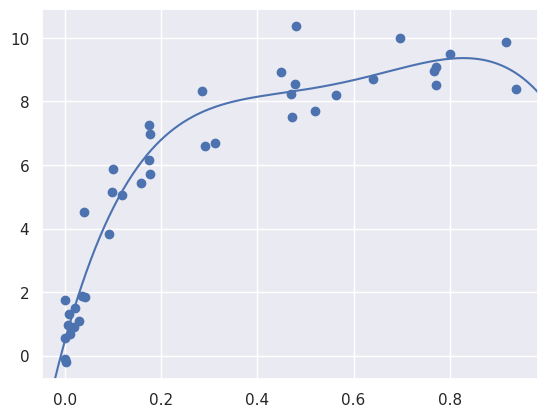

In [67]:
model =grid.best_estimator_
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test);
plt.plot(X_test.ravel(),y_test);
plt.axis(lim)

### ？评估模型的指标

## 特征工程

前面所有的例子都假定你的数据都是数值的，并且具有干净的形状为[n_samples, n_features]格式。在现实世界中，数据很少具有这样的格式。有了这个前提，要在实践中使用机器学习其中一个重要的步骤就是特征工程：也就是使用你拿到的数据，将它们转换为数值形式，以便你可以用来在特征矩阵中使用它们。

本节中我们会介绍一些特征工程任务的通用例子：表示分类数据的特征，表示文字的特征和表示图像的特征。除此之外我们还会讨论派生特征用于增加模型复杂度和对缺失值进行插值。通常这个过程被称为向量化，因为它意味着将任意数据转变成格式良好的向量。

### 类别特征


非数值数据的一个常见类型是分类数据。例如，假设你在研究房价的数据，数据集中除了数值特征如“价格”和“房间数”之外，还有会有例如“邻近地区”这样的信息。下面例子展示了这个数据的可能情况：

In [ ]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

如果想要对地点进行编码,理想的情况是：
```
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}
```

但是sklearn中数字都会被视作算数，甚至会认为
```
Queen Anne < Fremont < Wallingford
```
这种转换没有任何含义

sklearn的解决方案是：one-hot encoding
它能有效的创建额外的列代表一个类别的存在或缺失，分别使用数值1或0表示。如果你的数据是一个字典的列表格式，```Scikit-Learn``` 的 ```DictVectorizer```可以完成这项工作：

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer (sparse = False, dtype = int )
data1 = vec.fit_transform(data)
print(data1)
#打印出分类变量的名字
print(vec.get_feature_names_out())

[[     0      1      0 850000      4]
 [     1      0      0 700000      3]
 [     0      0      1 650000      3]
 [     1      0      0 600000      2]]
['neighborhood=Fremont' 'neighborhood=Queen Anne'
 'neighborhood=Wallingford' 'price' 'rooms']


变换之后'neighborhood'列已经被扩展成为3个独立的列，分别代表三个邻近地区的标签，然后每行中1所在的列的位置与邻近地区相关。经过这样的分类特征编码后，就可以使用```Scikit-Learn``` 模型进行拟合数据了。

**明显的缺点**

如果分类特征有很多取值，会极大地增加数据的大小，因为编码后的数据大部分是0，输出结果作为稀疏矩阵是非常高效的。所以可以选择```sparse=TRUE```



许多（虽然不是全部）Scikit-Learn评估器接受这样的稀疏输入作为模型拟合及预测的参数。```sklearn.preprocessing.OneHotEncoder```和```sklearn.feature_extraction.FeatureHasher```是另外两个额外的工具支持这种编码。

### 文本特征

文本特征工程常见的需求是将文字转换成一组代表它们的数字值。例如大多数社交媒体数据的自动挖掘都依赖于某种形式的文字到数字的编码转换。其中最简单的方法是进行单词计数：选取每一小段文字，计算里面每个单词出现的次数，然后将它们放到表中。

In [ ]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

想要将上面的数据使用单词计数进行向量化，我们可以构造一个列代表单词"problem"， 一个列代表单词"evil"，一个列代表单词"horizon"等等。虽然可以手工完成这项任务，但是你可以使用Scikit-Learn的CountVectorizer将自己从重复劳动中解放出来：

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
x=vec.fit_transform(sample)
x

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

查看稀疏矩阵

In [ ]:
import pandas as pd
pd.DataFrame(x.toarray(),
             columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


存在问题：原始的单词计数会导致特征在频繁出现的单词上放置了太多的权重，这对于一些分类算法来说是不够准确的。解决这个问题的其中一个办法是被称为term frequency-inverse document frequency (TF–IDF)的算法，它会将根据单词在文档中出现的频率单词计数的权重。计算这些特征的语法与前面的例子类似：

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x=vec.fit_transform(sample)
pd.DataFrame(x.toarray(),columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### 图像特征

还有一种常见的需求是将图像编码成适合机器学习分析的数据。最简单的方法在Scikit-Learn简介中已经看到过：直接使用图像的像素数据。但是根据应用场景不同，这种方法可能不是最优的。[链接文字](https://)

### 派生特征

### 缺失值处理

### 特征管道